In [2]:
import scipy.optimize
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
n = 10000
m = 100

T = np.zeros(n)

for j in range(n):
    X=stats.norm.rvs(size=m)
    X=np.sort(X)
    s=0
    for i in range(1,m+1):
      a=stats.norm.cdf(max(0.00001, X[i-1]))
      b=1-stats.norm.cdf(max(0.00001, X[m-i]))
      s+=((2*i-1)/m)*(np.log(a)+np.log(b))
    T[j]=-m-s

with open('Anderson-Darling.txt', 'w') as f:
  f.writelines(f"{item}\n" for item in T)

<ipython-input-3-2ba68a85ce8a>:16: RuntimeWarning: divide by zero encountered in log
  s+=((2*i-1)/n)*(np.log(a)+np.log(b))


19.541822797205953


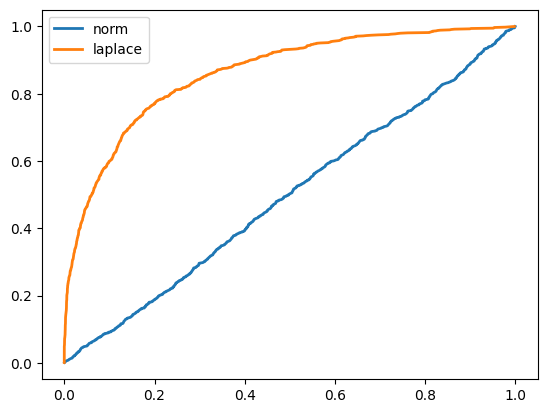

In [ ]:
## Задание 1


def MK(data, S):
  R=data>S
  size=len(data)
  pv=np.sum(R)/size
  return pv

def S(X, n):
    X=np.sort(X)
    s=0
    for i in range(1,n+1):
      a=stats.norm.cdf(max(0.00001, X[i-1]))
      b=1-stats.norm.cdf(max(0.00001, X[n-i]))
      s+=((2*i-1)/n)*(np.log(a)+np.log(b))
    T=-n-s
    return T

file = open('Anderson-Darling.txt', 'r')
data_ad = file.read().splitlines()
file.close()

T = [eval(x) for x in data_ad]


n=1000
m=100

T[0:n]

res1=[]
res2=[]
for i in range(n):
  X=stats.norm.rvs(size=m)
  Y=stats.laplace.rvs(size=m)
  S1=S(X,m)
  pv1=MK(T,S1)
  res1=np.append(res1, pv1)
  S2=S(Y,m)
  pv2=MK(T,S2)
  res2=np.append(res2, pv2)


res1=np.sort(res1)
res2=np.sort(res2)


y_vals = [(i+1)/n for i in range(n)]
fig,ax = plt.subplots()
ax.plot(res1, y_vals, label = f"norm", lw = 2)
ax.plot(res2, y_vals, label = f"laplace", lw = 2)

plt.legend()



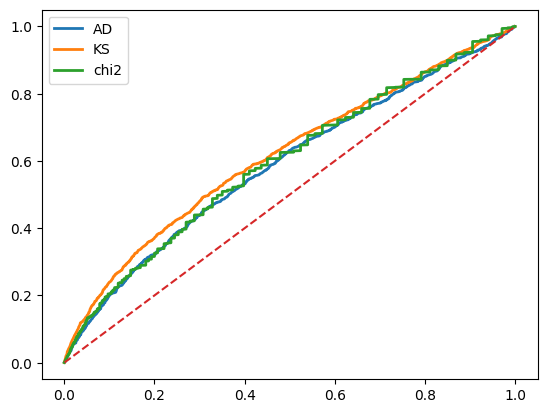

In [5]:
## Задание 2

def alt(m):
    sample=np.zeros(m)
    for i in range(m):
      b=stats.bernoulli(0.5).rvs
      if b==1:
        sample[i]=np.random.normal(loc=0.1, scale=1)
      else:
        sample[i]=np.random.normal(loc=-0.1, scale=1)
    return sample

def MK(data, S):
  R=data>S
  size=len(data)
  pv=np.sum(R)/size
  return pv

def S(X, n):
    X=np.sort(X)
    s=0
    for i in range(1,n+1):
      a=stats.norm.cdf(max(0.00001, X[i-1]))
      b=1-stats.norm.cdf(max(0.00001, X[n-i]))
      s+=((2*i-1)/n)*(np.log(a)+np.log(b))
    T=-n-s
    return T

n=1500
m=100

file = open('Anderson-Darling.txt', 'r')
data_ad = file.read().splitlines()
file.close()

T = [eval(x) for x in data_ad]

T[0:n]

c1 = stats.norm(0,1).ppf(0.25)
c2 = stats.norm(0,1).ppf(0.5)
c3 = stats.norm(0,1).ppf(0.75)

b=[m/4 for i in range(4)]

AD=[]
KS=[]
HK=[]

for i in range(n):
  X=alt(m)

  S1=S(X,m)
  pv1=MK(T,S1)
  AD.append(pv1)

  pv2=stats.kstest(X, stats.norm.cdf).pvalue
  KS.append(pv2)

  a=np.zeros(4)
  for i in range(m):
    if X[i]<=c1:
      a[0]+=1
    elif X[i]<=c2:
      a[1]+=1
    elif X[i]<=c3:
      a[2]+=1
    else:
      a[3]+=1
  pv3=stats.chisquare(f_exp=b, f_obs=a).pvalue
  HK.append(pv3)



AD.sort()
KS.sort()
HK.sort()

y_vals = [(i+1)/n for i in range(n)]


plt.plot(AD, y_vals, label = f"AD", lw = 2)
plt.plot(KS, y_vals, label = f"KS", lw = 2)
plt.plot(HK, y_vals, label = f"chi2", lw = 2)

plt.plot(y_vals,y_vals, linestyle='dashed')

plt.legend()
plt.show()
